In [ ]:
!pip install dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.3 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df = pd.read_csv("/content/correlated_retail_data.csv")

In [ ]:
print("Missing Values Before Handling:\n", df.isnull().sum())
print(df.dtypes)

Missing Values Before Handling:
 productid              0
product_name           0
product_category       0
month_year             0
qt                     0
unit_price             0
freight_price          0
product_name_length    0
product_description    0
product_photos_qty     0
product_weight_g       0
product_score          0
customers              0
weekday                0
weekend                0
holiday                0
month                  0
year                   0
s                      0
volume                 0
myntra_price           0
amazon_price           0
flipkart_price         0
ajio_price             0
meesho_price           0
myntra_rating          0
amazon_rating          0
flipkart_rating        0
ajio_rating            0
meesho_rating          0
customer_review        0
total_price            0
customers.1            0
dtype: int64
productid                int64
product_name            object
product_category        object
month_year              object
qt   

In [ ]:
price_columns = ['total_price', 'unit_price', 'freight_price', 'myntra_price', 'amazon_price',
                 'flipkart_price', 'ajio_price', 'meesho_price']
rating_columns = ['myntra_rating', 'amazon_rating', 'flipkart_rating', 'ajio_rating', 'meesho_rating']

# Round price columns to 2 decimal places
df[price_columns] = df[price_columns].round(2)

# Round rating columns to 1 decimal place
df[rating_columns] = df[rating_columns].round(1)

In [ ]:
print("\nDataset Summary:\n", df.describe())


Dataset Summary:
            productid             qt     unit_price  freight_price  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    50000.500000       9.994080     453.369214      27.523482   
std     28867.657797       5.469763     709.913942      12.972470   
min         1.000000       1.000000      19.040000       5.000000   
25%     25000.750000       5.000000      46.970000      16.330000   
50%     50000.500000      10.000000      62.520000      27.540000   
75%     75000.250000      15.000000     561.180000      38.770000   
max    100000.000000      19.000000    2486.630000      50.000000   

       product_name_length  product_description  product_photos_qty  \
count        100000.000000        100000.000000       100000.000000   
mean              8.551930           124.283010            2.498400   
std               2.953373            43.353249            1.118217   
min               4.000000            50.000000            1.000000   
25% 

In [ ]:
df.head()

,productid,product_name,product_category,month_year,qt,unit_price,freight_price,product_name_length,product_description,product_photos_qty,...,ajio_price,meesho_price,myntra_rating,amazon_rating,flipkart_rating,ajio_rating,meesho_rating,customer_review,total_price,customers.1
0,1,Novel,Books,2022-09,6,25.28,18.29,5,187,4,...,24.85,24.02,2.6,2.6,2.5,2.5,2.6,Terrible experience.,25.28,C04807
1,2,Lipstick,Beauty,2022-11,10,47.06,10.28,8,70,1,...,44.74,45.81,2.9,3.0,3.0,2.9,2.9,"It's okay, nothing special.",47.06,C04950
2,3,Refrigerator,Home Appliances,2023-11,11,553.52,43.83,12,155,4,...,516.46,529.02,4.4,4.4,4.2,4.3,4.5,Great product! Highly recommended.,553.52,C03144
3,4,Foundation,Beauty,2024-06,13,56.19,6.37,10,77,3,...,52.78,55.26,3.3,3.3,3.1,3.3,3.3,Neither good nor bad.,56.19,C06392
4,5,Foundation,Beauty,2024-05,15,39.57,17.81,10,63,3,...,35.48,36.80,4.1,4.2,4.0,3.9,4.2,"It's okay, nothing special.",39.57,C06780


In [ ]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Function to analyze sentiment
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(str(text))["compound"]
    if sentiment_score >= 0.05:
        return "Positive"
    elif sentiment_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [ ]:
# Apply sentiment analysis
df["sentiment"] = df["customer_review"].apply(get_sentiment)

In [ ]:
# Display sentiment distribution
print(df["sentiment"].value_counts())

sentiment
Positive    40078
Negative    32039
Neutral     27883
Name: count, dtype: int64


<ipython-input-14-31ad6b3b9aef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["sentiment"], palette="coolwarm")


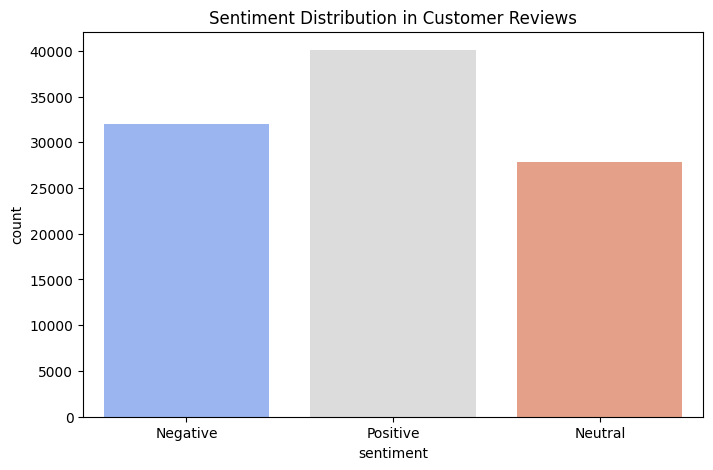

In [ ]:
# Visualize sentiment distribution
plt.figure(figsize=(8,5))
sns.countplot(x=df["sentiment"], palette="coolwarm")
plt.title("Sentiment Distribution in Customer Reviews")
plt.show()

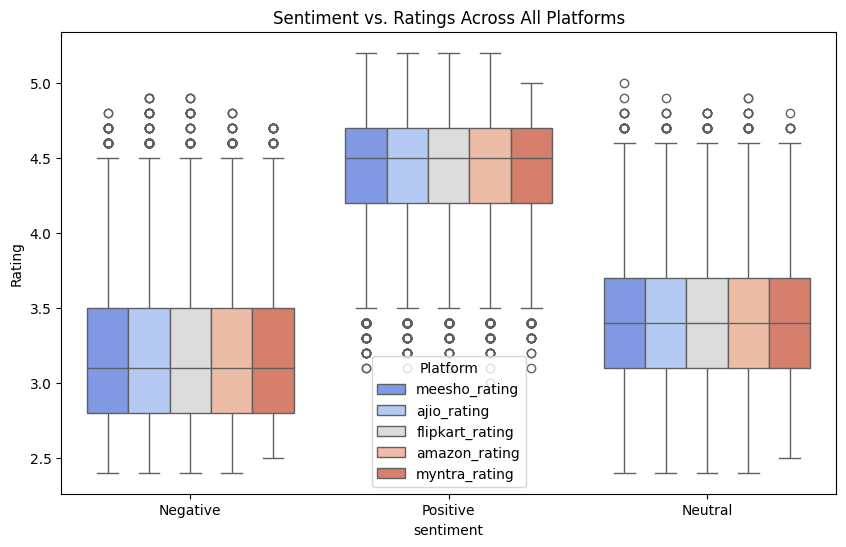

In [ ]:
# Correlation between sentiment and ratings across all platforms
platform_ratings = ["meesho_rating", "ajio_rating", "flipkart_rating", "amazon_rating", "myntra_rating"]

# Melt the dataframe for better visualization
df_melted = df.melt(id_vars=["sentiment"], value_vars=platform_ratings, var_name="Platform", value_name="Rating")

# Plot sentiment vs ratings for all platforms
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_melted["sentiment"], y=df_melted["Rating"], hue=df_melted["Platform"], palette="coolwarm")
plt.title("Sentiment vs. Ratings Across All Platforms")
plt.legend(title="Platform")
plt.show()

<ipython-input-17-5c5f39be297d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["sentiment"], y=df["avg_rating"], palette="coolwarm")


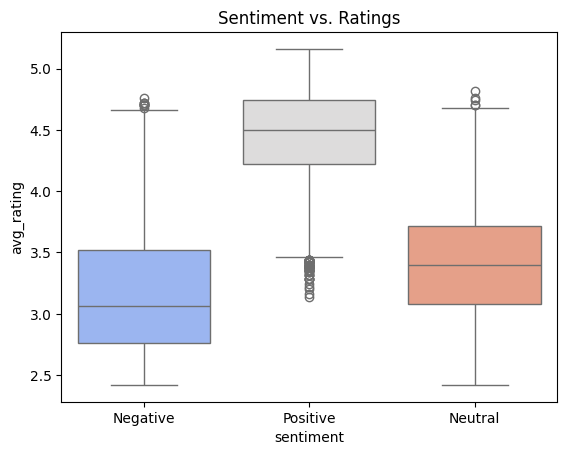

In [ ]:
df.to_csv('/content/retail_dataaa_with_score.csv', index=False)


In [ ]:
df = pd.read_csv("/content/retail_dataaa_with_score.csv")

In [ ]:
df["avg_rating"] = df[["meesho_rating", "ajio_rating", "flipkart_rating", "amazon_rating", "myntra_rating"]].mean(axis=1)

In [ ]:
# Convert sentiment to numeric values for correlation analysis
sentiment_map = {"Positive": 1, "Neutral": 0, "Negative": -1}
df["sentiment_score"] = df["sentiment"].map(sentiment_map)

In [ ]:
def calculate_optimized_price():
    product_name = input("Enter product name: ")
    product_data = df[df["product_name"].str.lower() == product_name.lower()]

    if product_data.empty:
        return f"Product '{product_name}' not found in the dataset."

    # Calculate the average competitor price
    avg_price = product_data[["meesho_price", "ajio_price", "flipkart_price", "amazon_price", "myntra_price"]].mean(axis=1).values[0]

    # Get sentiment and rating factors
    sentiment_factor = product_data["sentiment_score"].values[0]
    rating_factor = product_data["avg_rating"].values[0] / 5

    # Pricing weights (adjustable)
    alpha, beta = 0.05, 0.03
    optimized_price = avg_price * (1 + alpha * sentiment_factor + beta * rating_factor)

    return f"Suggested optimized price for '{product_name}': ₹{round(optimized_price, 2)}"

# Run the function with user input
print(calculate_optimized_price())


Enter product name: Novel
Suggested optimized price for 'Novel': ₹23.18


In [ ]:
!pip install dash pyngrok


In [ ]:
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
from flask import Flask
from pyngrok import ngrok


In [ ]:
server = Flask(__name__)  # Required for ngrok
app = Dash(__name__, server=server)

app.layout = html.Div([
    html.H1("Retail Price Optimization Dashboard", style={'textAlign': 'center'}),

    dcc.Dropdown(
        id='product-dropdown',
        options=[{'label': p, 'value': p} for p in df['product_name'].unique()],
        placeholder="Select a product",
        style={'width': '50%'}
    ),

    html.H3(id='optimal-price-output', style={'margin-top': '20px'}),

    dcc.Graph(id='price-comparison-graph'),
])

@app.callback(
    [Output('optimal-price-output', 'children'),
     Output('price-comparison-graph', 'figure')],
    [Input('product-dropdown', 'value')]
)
def update_dashboard(product_name):
    if not product_name:
        return "", {}

    product_data = df[df['product_name'] == product_name]

    avg_competitor_price = product_data[['meesho_price', 'ajio_price', 'flipkart_price', 'amazon_price', 'myntra_price']].mean(axis=1).values[0]
    sentiment_factor = product_data['sentiment_score'].mean()
    rating_factor = product_data["avg_rating"].mean() / 5

    alpha, beta = 0.05, 0.03
    optimized_price = avg_competitor_price * (1 + alpha * sentiment_factor + beta * rating_factor)

    optimal_price_text = f"Suggested Optimal Price: ₹{optimized_price:.2f}"

    # Competitor price comparison visualization
    price_comparison_fig = px.bar(
        product_data.melt(id_vars=['product_name'], value_vars=['meesho_price', 'ajio_price', 'flipkart_price', 'amazon_price', 'myntra_price']),
        x='variable', y='value', text='value', title='Competitor Price Comparison',
        labels={'variable': 'Platform', 'value': 'Price (₹)'}, color='variable'
    )

    return optimal_price_text, price_comparison_fig


!ngrok authtoken 2su6kABcOl50EQFj222zol0oafI_37G1ZN76iUPf5K3o53Ybg


In [ ]:
!pkill -f ngrok


In [ ]:
# Start ngrok tunnel
public_url = ngrok.connect(8050).public_url
print("Dashboard URL:", public_url)

# Run the Dash app
app.run_server(debug=False, host='0.0.0.0', port=8050)


Dashboard URL: https://c13a-35-185-170-244.ngrok-free.app


<IPython.core.display.Javascript object>

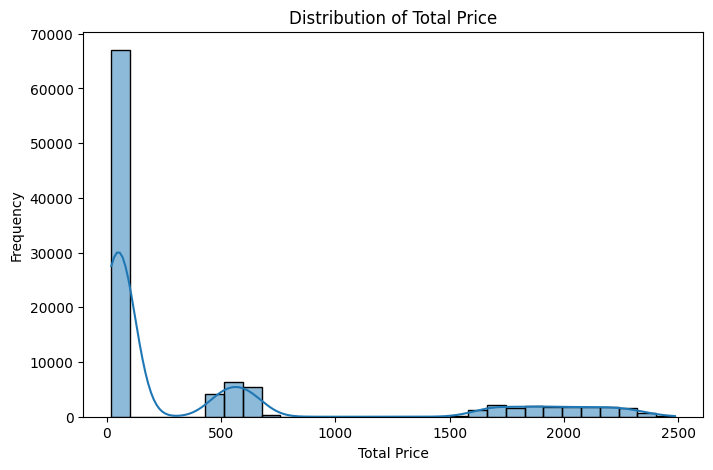

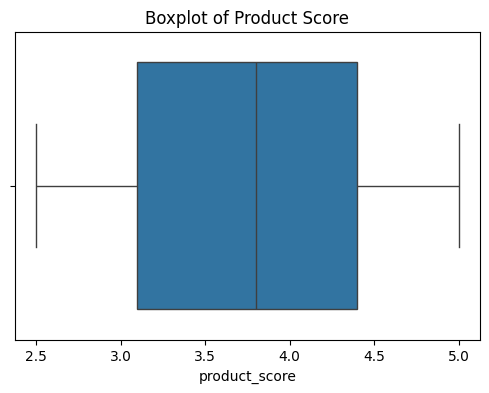

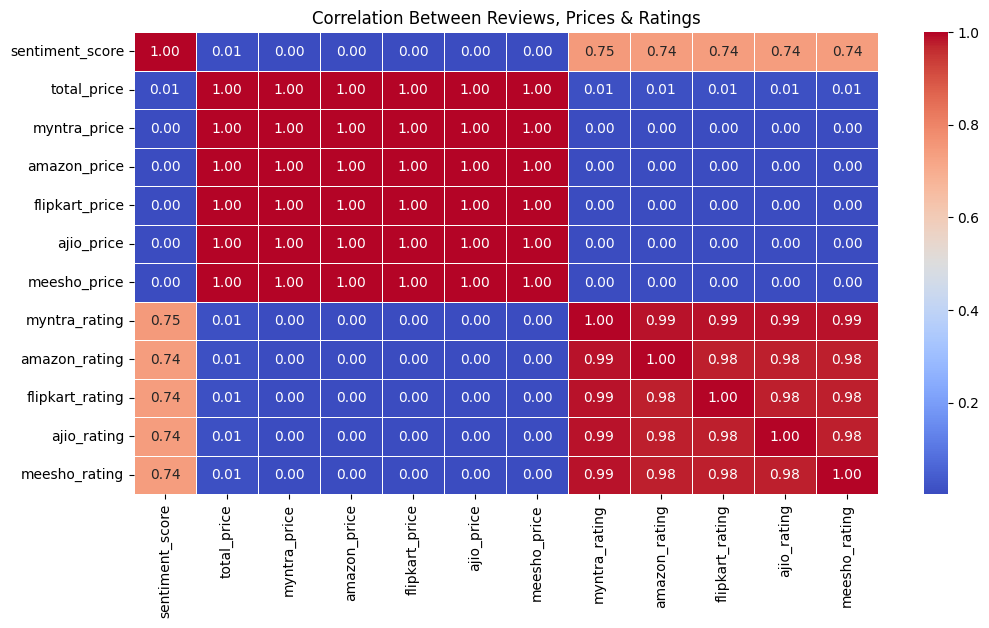

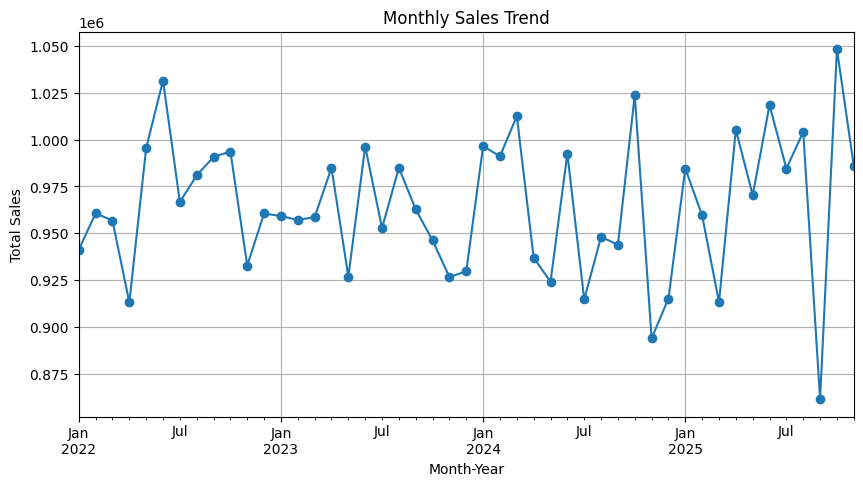

<ipython-input-33-3db143b2d8fd>:57: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




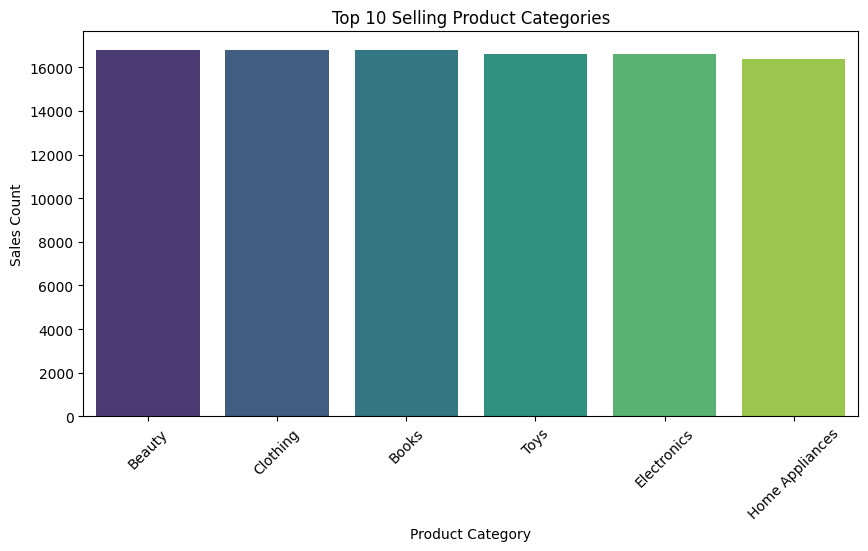

Number of Outliers in Total Price: 0


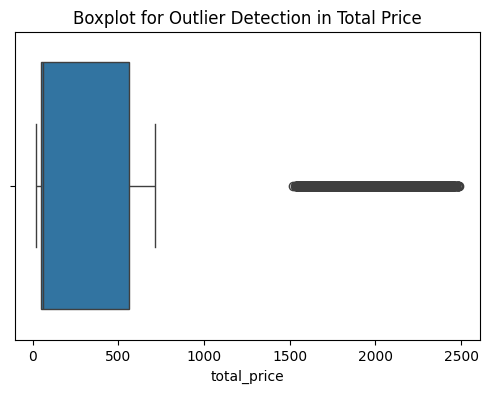

In [ ]:
from textblob import TextBlob
### STEP 2: Visualizing Distributions ###
# Histogram of total price
plt.figure(figsize=(8,5))
sns.histplot(df['total_price'], bins=30, kde=True)
plt.title("Distribution of Total Price")
plt.xlabel("Total Price")
plt.ylabel("Frequency")
plt.show()

# Boxplot of product score
plt.figure(figsize=(6,4))
sns.boxplot(x=df['product_score'])
plt.title("Boxplot of Product Score")
plt.show()

### STEP 3: Correlation Analysis ###

# 🔹 Convert Customer Reviews to Sentiment Scores
def get_sentiment(text):
    analysis = TextBlob(str(text))  # Convert to string in case of NaN
    return analysis.sentiment.polarity  # Returns value between -1 (negative) to +1 (positive)

df["sentiment_score"] = df["customer_review"].apply(get_sentiment)

# 🔹 Select Relevant Columns for Correlation
correlation_features = [
    "sentiment_score", "total_price",
    "myntra_price", "amazon_price", "flipkart_price", "ajio_price", "meesho_price",
    "myntra_rating", "amazon_rating", "flipkart_rating", "ajio_rating", "meesho_rating"
]

# 🔹 Compute Correlation Matrix
correlation_matrix = df[correlation_features].corr()

# 🔹 Visualize Correlation Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Reviews, Prices & Ratings")
plt.show()
### STEP 4: Customer Behavior Analysis ###

# Monthly sales trend
df['month_year'] = pd.to_datetime(df['month_year'])
monthly_sales = df.groupby(df['month_year'].dt.to_period("M"))['total_price'].sum()
plt.figure(figsize=(10,5))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

# Top-selling product categories
plt.figure(figsize=(10,5))
top_categories = df['product_category'].value_counts().nlargest(10)
sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
plt.title("Top 10 Selling Product Categories")
plt.xticks(rotation=45)
plt.xlabel("Product Category")
plt.ylabel("Sales Count")
plt.show()

### STEP 5: Outlier Detection ###
from scipy.stats import zscore

# Identify outliers in total_price
df['z_score'] = np.abs(zscore(df['total_price']))
outliers = df[df['z_score'] > 3]

print(f"Number of Outliers in Total Price: {outliers.shape[0]}")

# Boxplot for total price outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df['total_price'])
plt.title("Boxplot for Outlier Detection in Total Price")
plt.show()

# Remove outliers (Optional)
df_cleaned = df[df['z_score'] <= 3]
df_cleaned.drop(columns=['z_score'], inplace=True)  # Drop z-score column


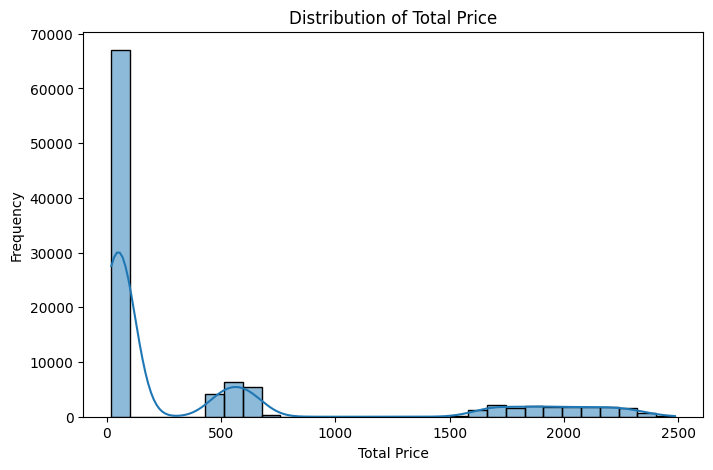

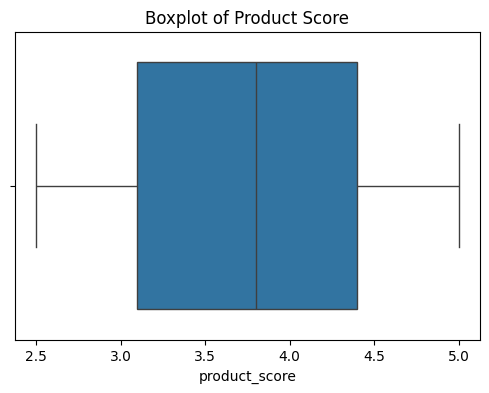

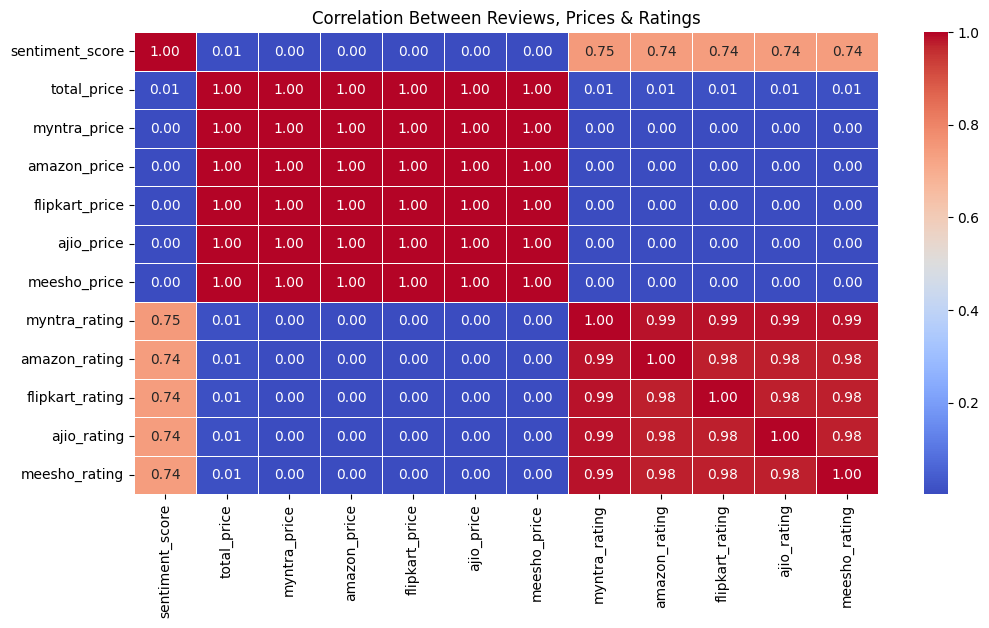

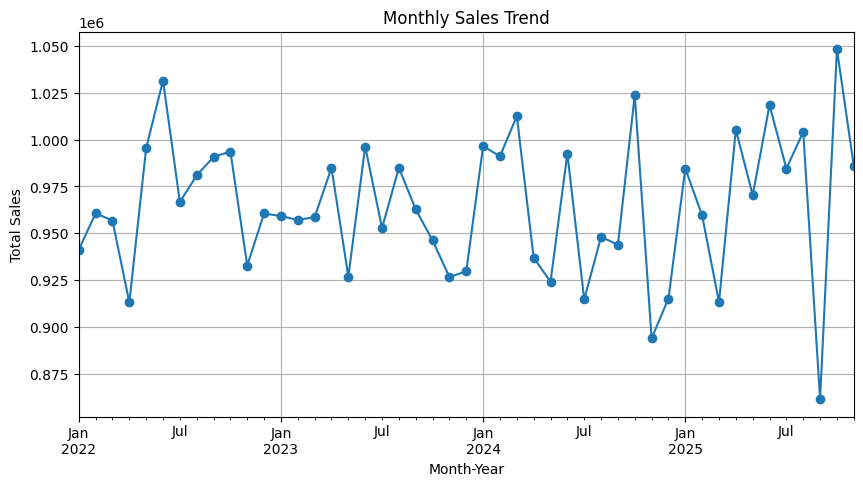

<ipython-input-34-3db143b2d8fd>:57: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




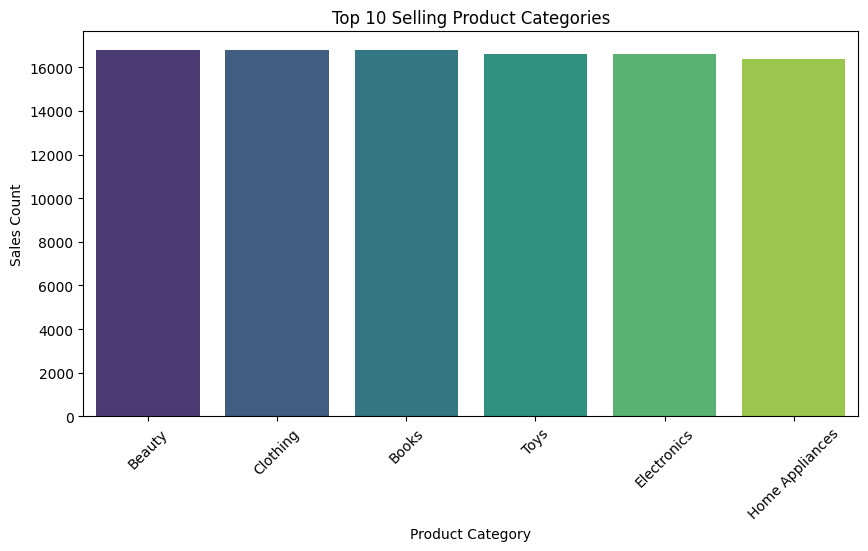

Number of Outliers in Total Price: 0


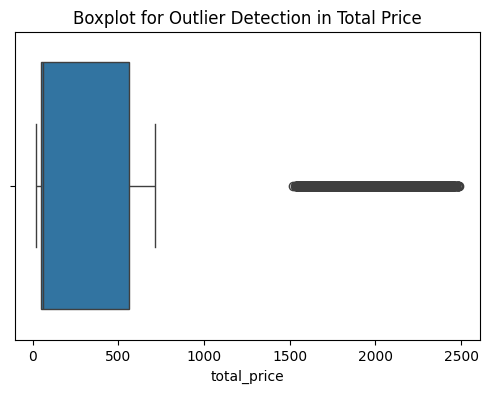

In [ ]:
from textblob import TextBlob
### STEP 2: Visualizing Distributions ###
# Histogram of total price
plt.figure(figsize=(8,5))
sns.histplot(df['total_price'], bins=30, kde=True)
plt.title("Distribution of Total Price")
plt.xlabel("Total Price")
plt.ylabel("Frequency")
plt.show()

# Boxplot of product score
plt.figure(figsize=(6,4))
sns.boxplot(x=df['product_score'])
plt.title("Boxplot of Product Score")
plt.show()

### STEP 3: Correlation Analysis ###

# 🔹 Convert Customer Reviews to Sentiment Scores
def get_sentiment(text):
    analysis = TextBlob(str(text))  # Convert to string in case of NaN
    return analysis.sentiment.polarity  # Returns value between -1 (negative) to +1 (positive)

df["sentiment_score"] = df["customer_review"].apply(get_sentiment)

# 🔹 Select Relevant Columns for Correlation
correlation_features = [
    "sentiment_score", "total_price",
    "myntra_price", "amazon_price", "flipkart_price", "ajio_price", "meesho_price",
    "myntra_rating", "amazon_rating", "flipkart_rating", "ajio_rating", "meesho_rating"
]

# 🔹 Compute Correlation Matrix
correlation_matrix = df[correlation_features].corr()

# 🔹 Visualize Correlation Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Reviews, Prices & Ratings")
plt.show()
### STEP 4: Customer Behavior Analysis ###

# Monthly sales trend
df['month_year'] = pd.to_datetime(df['month_year'])
monthly_sales = df.groupby(df['month_year'].dt.to_period("M"))['total_price'].sum()
plt.figure(figsize=(10,5))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

# Top-selling product categories
plt.figure(figsize=(10,5))
top_categories = df['product_category'].value_counts().nlargest(10)
sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
plt.title("Top 10 Selling Product Categories")
plt.xticks(rotation=45)
plt.xlabel("Product Category")
plt.ylabel("Sales Count")
plt.show()

### STEP 5: Outlier Detection ###
from scipy.stats import zscore

# Identify outliers in total_price
df['z_score'] = np.abs(zscore(df['total_price']))
outliers = df[df['z_score'] > 3]

print(f"Number of Outliers in Total Price: {outliers.shape[0]}")

# Boxplot for total price outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df['total_price'])
plt.title("Boxplot for Outlier Detection in Total Price")
plt.show()

# Remove outliers (Optional)
df_cleaned = df[df['z_score'] <= 3]
df_cleaned.drop(columns=['z_score'], inplace=True)  # Drop z-score column


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Select relevant features
X = df[['month', 'year', 'weekend', 'weekday']]
y = df['total_price']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=50, min_samples_split=5, random_state=42)

linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predict optimal prices
df['predicted_price_linear'] = linear_model.predict(scaler.transform(X))
df['predicted_price_rf'] = rf_model.predict(scaler.transform(X))

# Print original and predicted prices
print(df[['month', 'year', 'predicted_price_linear', 'predicted_price_rf']].head())


   month  year  predicted_price_linear  predicted_price_rf
0     12  2024              467.265130          504.684658
1     12  2024              463.693264          419.306144
2      5  2022              445.181468          478.576097
3      3  2025              451.676665          442.958353
4      8  2022              454.379537          508.872639


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Convert necessary columns to appropriate data types
df['qt'] = pd.to_numeric(df['qt'], errors='coerce')
df['total_price'] = pd.to_numeric(df['total_price'], errors='coerce')  # Keep as unit price (not multiplied by qt)

# Selecting relevant features for prediction
features = ['myntra_price', 'amazon_price', 'flipkart_price', 'ajio_price', 'meesho_price',
            'myntra_rating', 'amazon_rating', 'flipkart_rating', 'ajio_rating', 'meesho_rating']
X = df[features]
y = df['total_price']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=50, min_samples_split=5, random_state=42)

linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

#Function to Predict & Visualize
def predict_and_visualize(product_name):
    #Filter Data for Given Product
    product_data = df[df['product_name'].str.lower() == product_name.lower()]

    if product_data.empty:
        print("Product not found in dataset!")
        return

    #Calculate Average Prices & Ratings
    avg_original_price = product_data['total_price'].mean()
    avg_competitor_prices = {
        "Myntra": product_data['myntra_price'].mean(),
        "Amazon": product_data['amazon_price'].mean(),
        "Flipkart": product_data['flipkart_price'].mean(),
        "Ajio": product_data['ajio_price'].mean(),
        "Meesho": product_data['meesho_price'].mean()
    }

    avg_competitor_ratings = {
        "Myntra": product_data['myntra_rating'].mean(),
        "Amazon": product_data['amazon_rating'].mean(),
        "Flipkart": product_data['flipkart_rating'].mean(),
        "Ajio": product_data['ajio_rating'].mean(),
        "Meesho": product_data['meesho_rating'].mean()
    }

    #Predict Optimized Price
    X_product = product_data[features].mean().values.reshape(1, -1)
    X_product_scaled = scaler.transform(X_product)

    predicted_price_linear = linear_model.predict(X_product_scaled)[0]
    predicted_price_rf = rf_model.predict(X_product_scaled)[0]

    #Print Results
    print("\n**Predicted Prices:**")
    print(f"Optimized Price (Linear Regression): {round(predicted_price_linear, 2)}")
    print(f"Optimized Price (Random Forest): {round(predicted_price_rf, 2)}")

    print("\n**Original & Competitor Prices:**")
    for key, value in avg_competitor_prices.items():
        print(f"{key} Price: {round(value, 2)}")
    print(f"Original Price: {round(avg_original_price, 2)}")

    print("\n**Average Competitor Ratings:**")
    for key, value in avg_competitor_ratings.items():
        print(f"{key} Rating: {round(value, 1)}")
    plt.show()

#Get User Input & Predict
product_name = input("Enter product name: ")
predict_and_visualize(product_name)


Enter product name: Lipstick

**Predicted Prices:**
Optimized Price (Linear Regression): 47.31
Optimized Price (Random Forest): 47.03

**Original & Competitor Prices:**
Myntra Price: 44.02
Amazon Price: 44.02
Flipkart Price: 44.0
Ajio Price: 43.97
Meesho Price: 44.0
Original Price: 47.3

**Average Competitor Ratings:**
Myntra Rating: 3.8
Amazon Rating: 3.7
Flipkart Rating: 3.8
Ajio Rating: 3.8
Meesho Rating: 3.7


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [ ]:
data = pd.read_csv('/content/retail_dataaa_with_score.csv')
columns_needed = ["unit_price", "myntra_price" , "flipkart_price", "ajio_price", "meesho_price", "amazon_price", "product_name"]
data = data[columns_needed]

# 🔹 Step 5: Define X (features) and Y (target)
X = data[["myntra_price" , "flipkart_price", "ajio_price", "meesho_price", "amazon_price"]]  # Competitor prices as features
y = data["unit_price"]  # Actual price (unit_price) as target variable

# 🔹 Step 6: Split data into Training and Testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Step 7: Train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 🔹 Step 8: Evaluate model performance
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("\nModel Performance: Mean Absolute Error (MAE) =", round(mae, 2))

# 🔹 Step 9: Function to predict optimized price for a given product
def get_optimized_price(product_id):
    product_data = data[data["product_name"] == product_name]

    if product_data.empty:
        return "❌ Product not found in the dataset!"

    # Extract competitor prices
    comp1 = product_data["myntra_price"].values[0]
    comp2 = product_data["flipkart_price"].values[0]
    comp3 = product_data["ajio_price"].values[0]
    comp4 = product_data["meesho_price"].values[0]
    comp5 = product_data["amazon_price"].values[0]

    # Predict optimized price based on competitor prices
    input_data = np.array([[comp1, comp2, comp3,comp4, comp5]])
    predicted_price = model.predict(input_data)[0]

    return round(predicted_price, 2)

# 🔹 Step 10: Take user input for product ID
product_id = input("\nEnter the Product Name: ")

# 🔹 Step 11: Predict and display the optimized price
optimized_price = get_optimized_price(product_id)
print(f"\n📌 Recommended Optimized Price for Product ID '{product_name}': ₹{optimized_price}")



Model Performance: Mean Absolute Error (MAE) = 5.74

Enter the Product Name: Lipstick

📌 Recommended Optimized Price for Product ID 'Lipstick': ₹47.18


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

